In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
df = pd.read_csv("Financials.csv")
df.columns = df.columns.str.strip()

cols_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales',
                 'Discounts', 'Sales', 'COGS', 'Profit']

def clean_currency(x):
    if isinstance(x, str):
        x = x.strip().replace('$', '').replace(',', '')
        if x == '-' or x == '':
            return np.nan
        if x.startswith('(') and x.endswith(')'):
            x = '-' + x[1:-1]
        return float(x)
    return x

for col in cols_to_clean:
    df[col] = df[col].apply(clean_currency)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [4]:
df.describe()
df.isna().sum()


Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  5
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

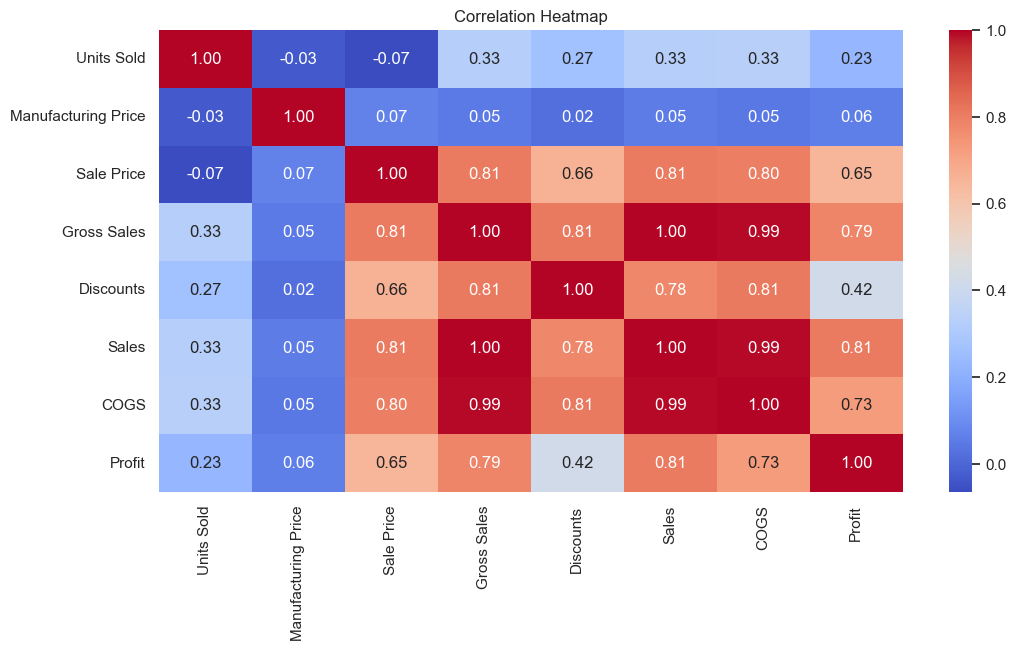

In [5]:
financial_features = ['Units Sold', 'Manufacturing Price', 'Sale Price',
                      'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

sns.heatmap(df[financial_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


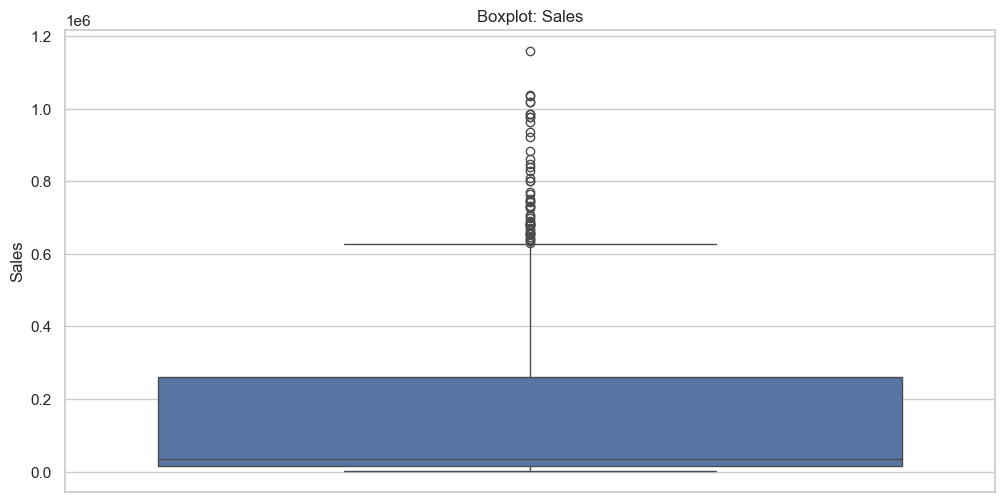

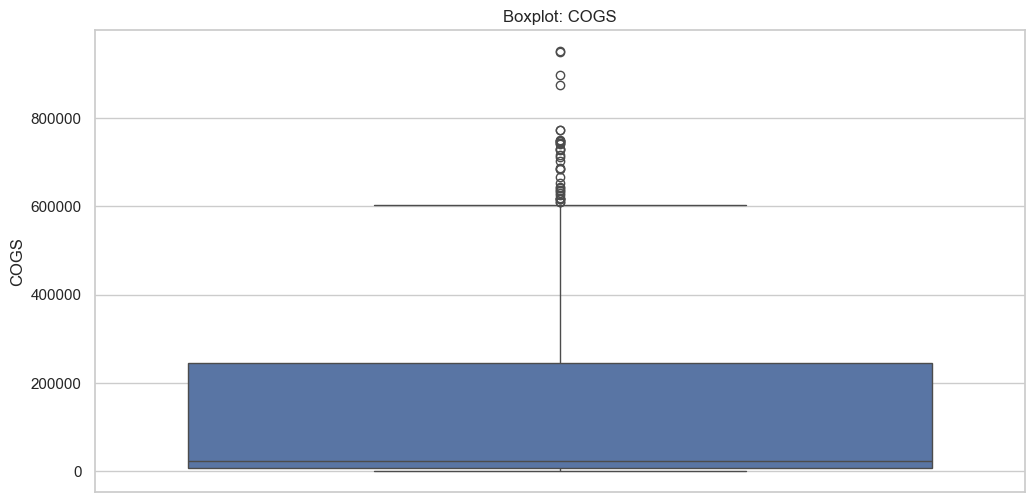

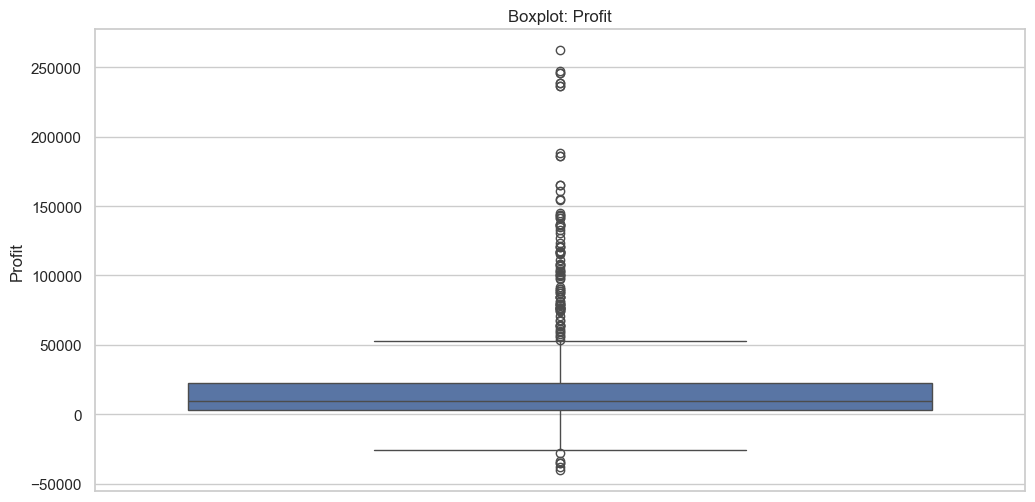

In [6]:
for col in ['Sales', 'COGS', 'Profit']:
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


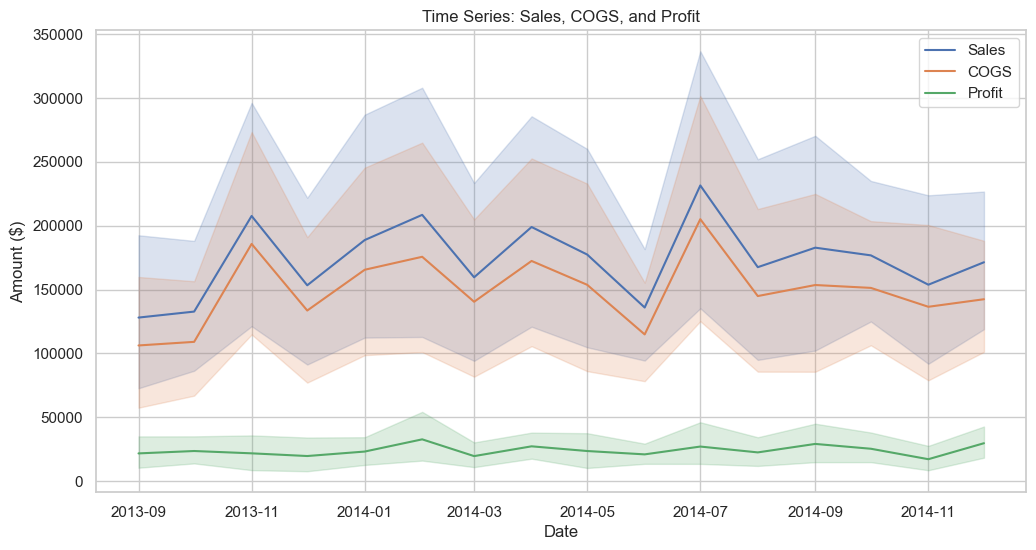

In [7]:
df_sorted = df.sort_values('Date')
sns.lineplot(data=df_sorted, x='Date', y='Sales', label='Sales')
sns.lineplot(data=df_sorted, x='Date', y='COGS', label='COGS')
sns.lineplot(data=df_sorted, x='Date', y='Profit', label='Profit')
plt.title("Time Series: Sales, COGS, and Profit")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()


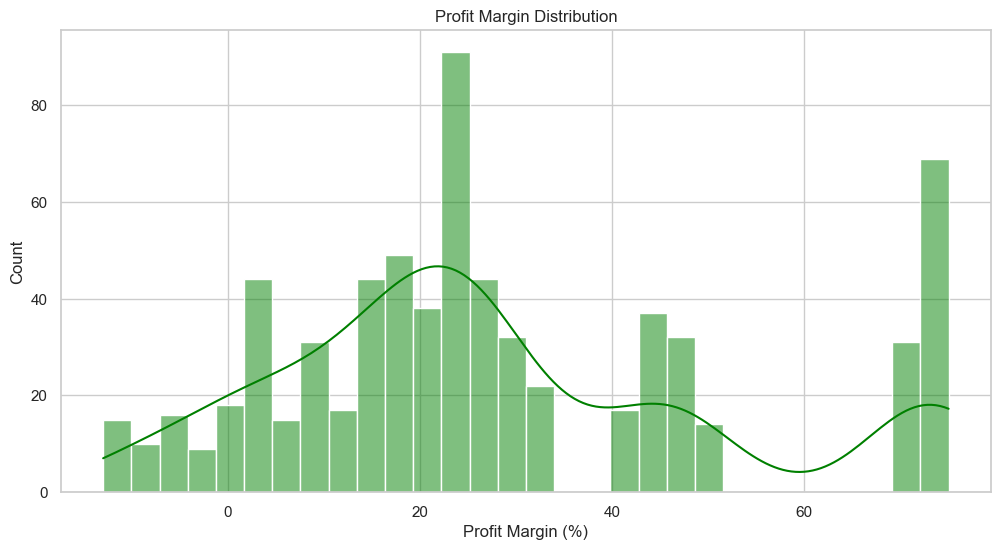

In [8]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
df['Discounts'] = df['Discounts'].fillna(0)
df['Profit'] = df['Profit'].fillna(df['Sales'] - df['COGS'])
df['Fiscal Year'] = df['Date'].dt.year

sns.histplot(df['Profit Margin (%)'], bins=30, kde=True, color='green')
plt.title("Profit Margin Distribution")
plt.show()


In [ ]:
fiscal_summary = df.groupby('Fiscal Year')[['Sales', 'COGS', 'Profit']].sum().reset_index()

sns.lineplot(data=fiscal_summary, x='Fiscal Year', y='Sales', label='Sales')
sns.lineplot(data=fiscal_summary, x='Fiscal Year', y='COGS', label='COGS')
sns.lineplot(data=fiscal_summary, x='Fiscal Year', y='Profit', label='Profit')
plt.title("Fiscal Year-wise Performance")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()


In [1]:
df.to_csv("Cleaned_Financials.csv", index=False)


NameError: name 'df' is not defined